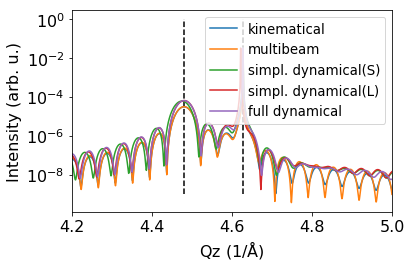

In [3]:
# This file is part of xrayutilities.
#
# xrayutilities is free software; you can redistribute it and/or modify
# it under the terms of the GNU General Public License as published by
# the Free Software Foundation; either version 2 of the License, or
# (at your option) any later version.
#
# This program is distributed in the hope that it will be useful,
# but WITHOUT ANY WARRANTY; without even the implied warranty of
# MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
# GNU General Public License for more details.
#
# You should have received a copy of the GNU General Public License
# along with this program; if not, see <http://www.gnu.org/licenses/>.
#
# Copyright (C) 2016 Dominik Kriegner <dominik.kriegner@gmail.com>

import xrayutilities as xu
import matplotlib.pyplot as plt


mpl.rcParams['font.size'] = 16.0


en = 8500  # eV
resol = 0.0004  # resolution in q
H, K, L = (0, 0, 4)
qz = linspace(4.2, 5.0, 3000)

sub = xu.simpack.Layer(xu.materials.Si, inf)
lay = xu.simpack.Layer(xu.materials.SiGe(0.6), 145.87, relaxation=0.5)
# pseudomorphic stack -> adjusts lattice parameters!
pls = xu.simpack.PseudomorphicStack001('pseudo', sub, lay)

# calculate incidence angle for dynamical diffraction models
qx = sqrt(sub.material.Q(H, K, L)[0]**2 + sub.material.Q(H, K, L)[1]**2)
ai = xu.simpack.coplanar_alphai(qx, qz, en)
resolai = abs(xu.simpack.coplanar_alphai(qx, mean(qz) + resol, en) -
              xu.simpack.coplanar_alphai(qx, mean(qz), en))

# comparison of different diffraction models
# simplest kinematical diffraction model
mk = xu.simpack.KinematicalModel(pls, energy=en, resolution_width=resol)
Ikin = mk.simulate(qz, hkl=(H, K, L), refraction=True)

# kinematic multibeam diffraction model
mk = xu.simpack.KinematicalMultiBeamModel(pls, energy=en,
                                          surface_hkl=(0, 0, 1),
                                          resolution_width=resol)
Imult = mk.simulate(qz, hkl=(H, K, L), refraction=True)

# simplified dynamical diffraction model
mds = xu.simpack.SimpleDynamicalCoplanarModel(pls, energy=en,
                                              resolution_width=resolai)
Idynsub = mds.simulate(ai, hkl=(H, K, L), idxref=0)
Idynlay = mds.simulate(ai, hkl=(H, K, L), idxref=1)

# general 2-beam theory based dynamical diffraction model
md = xu.simpack.DynamicalModel(pls, energy=en, resolution_width=resolai)
Idyn = md.simulate(ai, hkl=(H, K, L))

# plot of calculated intensities
plt.figure('XU-simpack SiGe')
plt.clf()
plt.semilogy(qz, Ikin, label='kinematical')
plt.semilogy(qz, Imult, label='multibeam')
plt.semilogy(xu.simpack.get_qz(qx, ai, en), Idynsub, label='simpl. dynamical(S)')
plt.semilogy(xu.simpack.get_qz(qx, ai, en), Idynlay, label='simpl. dynamical(L)')
plt.semilogy(xu.simpack.get_qz(qx, ai, en), Idyn, label='full dynamical')
plt.vlines([4*2*pi/l.material.a3[-1] for l in pls], 1e-9, 1, linestyles='dashed')
plt.legend(fontsize='small')
plt.xlim(qz.min(), qz.max())
plt.xlabel(r'Qz ($1/\mathrm{\AA}$)')
plt.ylabel('Intensity (arb. u.)')
plt.tight_layout()
plt.show()

In [10]:
La = xu.materials.elements.La
Al = xu.materials.elements.Al
O = xu.materials.elements.O2m
Sr = xu.materials.elements.Sr
Ti = xu.materials.elements.Ti
Ta = xu.materials.elements.Ta
Y = xu.materials.elements.Y
Bi = xu.materials.elements.Bi
Fe = xu.materials.elements.Fe

energy = 8040 #eV        

substrate = xu.materials.Crystal("LaAlO3", xu.materials.SGLattice(221, 3.784, \
              atoms=[La, Al, O], pos=['1a', '1b', '3c']))

BFO = xu.materials.Crystal("T-BFO", xu.materials.SGLattice(9, 3.7, 3.7, 4.66, 89, atoms=[Bi, Fe, O], pos=['1a', '1b', '3c']))
#hxrd = xu.HXRD(substrate.Q(int(self.iHKL[0]), int(self.iHKL[1]), int(self.iHKL[2])), \
#              substrate.Q(int(self.oHKL[0]), int(self.oHKL[1]), int(self.oHKL[2])), en=energy, geometry = 'hi_lo')



sub = xu.simpack.Layer(substrate, inf)
lay = xu.simpack.Layer(BFO, 145.87, relaxation=0)
# pseudomorphic stack -> adjusts lattice parameters!
pls = xu.simpack.PseudomorphicStack001('pseudo', sub, lay)


# calculate incidence angle for dynamical diffraction models
qx = sqrt(sub.material.Q(H, K, L)[0]**2 + sub.material.Q(H, K, L)[1]**2)
ai = xu.simpack.coplanar_alphai(qx, qz, en)
resolai = abs(xu.simpack.coplanar_alphai(qx, mean(qz) + resol, en) -
              xu.simpack.coplanar_alphai(qx, mean(qz), en))


# general 2-beam theory based dynamical diffraction model
md = xu.simpack.DynamicalModel(pls, energy=en, resolution_width=resolai)
Idyn = md.simulate(ai, hkl=(H, K, L))

# plot of calculated intensities
plt.figure('XU-simpack SiGe')
plt.clf()
#plt.semilogy(qz, Ikin, label='kinematical')
#plt.semilogy(qz, Imult, label='multibeam')
#plt.semilogy(xu.simpack.get_qz(qx, ai, en), Idynsub, label='simpl. dynamical(S)')
#plt.semilogy(xu.simpack.get_qz(qx, ai, en), Idynlay, label='simpl. dynamical(L)')
plt.semilogy(xu.simpack.get_qz(qx, ai, en), Idyn, label='full dynamical')
#plt.vlines([4*2*pi/l.material.a3[-1] for l in pls], 1e-9, 1, linestyles='dashed')
plt.legend(fontsize='small')
plt.xlim(qz.min(), qz.max())
plt.xlabel(r'Qz ($1/\mathrm{\AA}$)')
plt.ylabel('Intensity (arb. u.)')
plt.tight_layout()
plt.show()

InputError: 'layer' argument needs elastic parameters

In [ ]:
# calculate incidence angle for dynamical diffraction models
qx = sqrt(sub.material.Q(H, K, L)[0]**2 + sub.material.Q(H, K, L)[1]**2)
ai = xu.simpack.coplanar_alphai(qx, qz, en)
resolai = abs(xu.simpack.coplanar_alphai(qx, mean(qz) + resol, en) -
              xu.simpack.coplanar_alphai(qx, mean(qz), en))

KeyError: '1a'

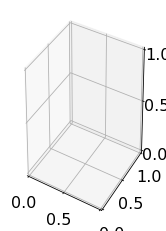

In [11]:
f = plt.figure()
BFO.show_unitcell(fig=f, subplot=121)
title('InP zincblende')
#InPWZ.show_unitcell(fig=f, subplot=122)
#title('InP wurtzite')